In [48]:
import sinter
from typing import List 
import matplotlib.pyplot as plt

In [49]:
stats_memory : List[sinter.TaskStats] = sinter.stats_from_csv_files('./out/verification.csv')
print(stats_memory[0])



   3415346,       318,         0,    44.1,pymatching,1d983939f6b96e221c2d79a613260a27f222f9455390f9942241de4b5eb26bf0,"{""code_name"":""GaugeFloquetColourCode"",""d_x"":12,""d_z"":8,""gf_0"":1,""gf_1"":1,""gf_2"":0,""h"":4,""logical_observable"":""memory_x"",""noise_model"":""circuit_level_noise""}",


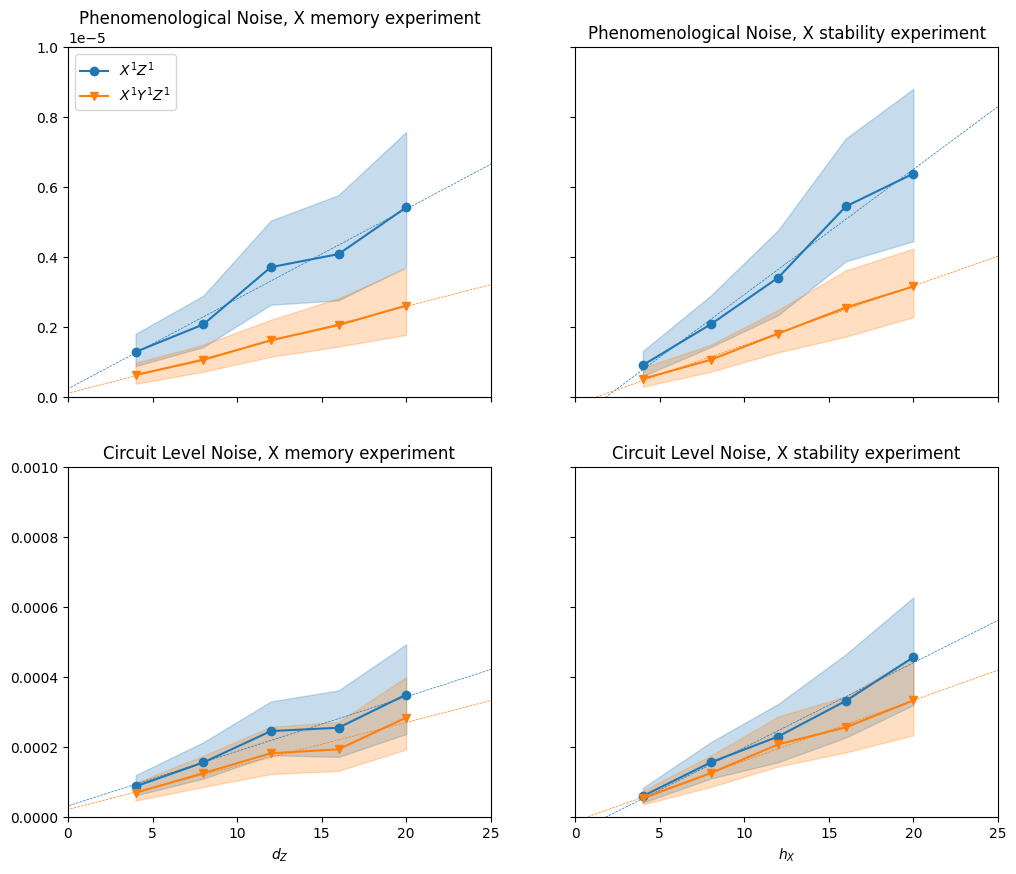

In [58]:
fig, ax = plt.subplots(2,2, sharey='row', sharex='col', figsize=(12,10))
sinter.plot_error_rate(ax=ax[0][0], stats=stats_memory, group_func=lambda stat: f"{stat.json_metadata['code_name']}",
                       x_func=lambda stat: stat.json_metadata['d_x'], filter_func=lambda stat: stat.json_metadata['h'] == 8 and stat.json_metadata['noise_model'] == 'phenomenological', line_fits=('linear', 'linear'))
sinter.plot_error_rate(ax=ax[0][1], stats=stats_memory, x_func=lambda stat: stat.json_metadata['h'], filter_func=lambda stat: stat.json_metadata['d_x'] == 8 and stat.json_metadata['noise_model'] == 'phenomenological', group_func=lambda stat: f"{stat.json_metadata['code_name']}",line_fits=('linear', 'linear'))

sinter.plot_error_rate(ax=ax[1][0], stats=stats_memory, group_func=lambda stat: f"{stat.json_metadata['code_name']}",
                       x_func=lambda stat: stat.json_metadata['d_x'], filter_func=lambda stat: stat.json_metadata['h'] == 8 and stat.json_metadata['noise_model'] == 'circuit_level_noise', line_fits=('linear', 'linear'))
sinter.plot_error_rate(ax=ax[1][1], stats=stats_memory, x_func=lambda stat: stat.json_metadata['h'], filter_func=lambda stat: stat.json_metadata['d_x'] == 8 and stat.json_metadata['noise_model'] == 'circuit_level_noise', group_func=lambda stat: f"{stat.json_metadata['code_name']}",line_fits=('linear', 'linear'))

ax[0][0].set_xlim(0,25)
ax[0][1].set_xlim(0,25)
ax[0][0].set_ylim(0,10e-6)

ax[1][0].set_xlim(0,25)
ax[1][1].set_xlim(0,25)
ax[1][0].set_ylim(0,10e-4)
handles, labels = ax[0][0].get_legend_handles_labels()
ax[0][0].legend(handles=[handles[0], handles[1]], labels=['$X^1Z^1$', '$X^1Y^1Z^1$'], loc='upper left')
ax[1][0].set_xlabel('$d_Z$')
ax[1][1].set_xlabel('$h_X$')
ax[0][0].set_title('Phenomenological Noise, X memory experiment')
ax[0][1].set_title('Phenomenological Noise, X stability experiment')
ax[1][0].set_title('Circuit Level Noise, X memory experiment')
ax[1][1].set_title('Circuit Level Noise, X stability experiment')

x_s = [stat for stat in stats_memory if stat.json_metadata['code_name']]
